# TensorFlow

In [2]:
import tensorflow as tf

## グラフの作成
グラフとは，様々な演算によって得られるテンソル（配列）どうしの関係を有向グラフとして記述したもの．
例えば，テンソルCはテンソルAとテンソルBの和で，テンソルDはテンソルCを2倍したもの，などが表現される．
TensorFlowは計算過程を一度グラフという形で記述することで，自動微分などを可能としている．
基本的にグラフの構造を意識しなくても，テンソルをnumpy配列のように扱うことで生成できる．
しかし，この過程で実際にテンソルの値が計算されるのではないことに注意．

In [15]:
graph = tf.Graph()
with graph.as_default():
    a = tf.constant(1)
    b = tf.constant(2)
    c = a + b
    d = 2 * c

## セッションの作成
グラフに記述された演算はセッションの中で実行される．
セッションを生成し，演算を実行する時に，必要に応じてメモリが確保される．
セッションをクローズするとメモリは解放される．

In [29]:
sess = tf.Session(graph=graph)
print('a = {}'.format(sess.run(a)))
print('b = {}'.format(sess.run(b)))
print('[c, d] = {}'.format(sess.run([c, d])))
# グラフの要素に値をフィード（この場合，aを5で上書き）することができる
print('d|_{{a=5}} = {}'.format(sess.run(d, {a: 5})))

a = 1
b = 2
[c, d] = [3, 6]
d|_{a=5} = 14


## グラフの要素
下記の要素を定義したり，それらの四則演算などで新たな要素を定義することでグラフを構築して行く．
これらの要素（テンソル）は，上記のように評価することも値をフィードすることもできる．

In [38]:
graph = tf.Graph()
sess = tf.Session(graph=graph)

# 定数：評価すると常に同じ値を返す．
with graph.as_default():
    c = tf.constant([1,2,3], dtype=tf.float32)
print('c = {}'.format(sess.run(c)))

# プレースホルダ：値がフィードされることを前提とする要素．
with graph.as_default():
    ph = tf.placeholder(tf.float32)                       # 型がfloat32ならばなんでも良い
    ph_2d = tf.placeholder(tf.float32, shape=[None,None]) # 任意のサイズの二次元配列
    ph_3x3 = tf.placeholder(tf.float32, shape=[3,3])      # 3x3の二次元配列
    x = 2 * ph
print('x = {}'.format(sess.run(x, {ph: [5,2]})))          # xはphにフィードしないと評価できない
    
# 変数：値を代入することができ，評価すると現在代入されている値を返す．
with graph.as_default():
    v = tf.Variable(1.0)    # 1.0は初期値
    assign_op = v.assign(x) # 評価するとvにxを代入する
sess.run(v.initializer)     # vを初期化する
print('v = {}'.format(sess.run(v)))
sess.run(assign_op, {ph: 2.})  # vにxを代入する（ここでもphへのフィードが必要）
print('v = {}'.format(sess.run(v)))

c = [1. 2. 3.]
x = [10.  4.]
v = 1.0
v = 4.0


## 関数の最小化
このように一度グラフを定義するというスタイルによって，自動微分が可能となっているところがTensorFlowの大きな特徴である．
次のセルを実行してvを初期化した後，その次のセルを繰り返し実行するとEを最小化するvを求めることができる．

In [57]:
graph = tf.Graph()
with graph.as_default():
    v = tf.Variable(1.0)
    E = 3*v**2 + 2*v + 4
    
    opt = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
    init_op = v.initializer
    update_op = opt.minimize(E) # 評価するとEをvについて最小化するための更新を一回行う
    
sess = tf.Session(graph=graph)
sess.run(init_op)

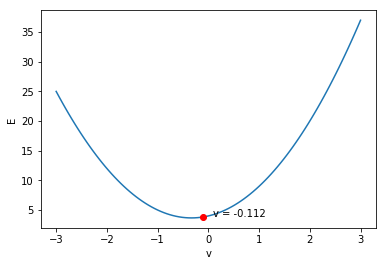

In [86]:
import numpy as np
import matplotlib.pyplot as plt

sess.run(update_op)
_v, _E = sess.run([v, E])

plt.figure()
x = np.linspace(-3,3,100)
y = 3*x**2 + 2*x + 4
plt.plot(x, y)

plt.plot(_v, _E, 'ro')
plt.text(_v+.2, _E, 'v = {:.3f}'.format(_v))
plt.xlabel('v')
plt.ylabel('E')
plt.show()